# 

# Ordinary Differential Equations

In this notebook, we’ll explore how to solve ordinary differential
equations (ODEs) in practice, focusing on two approaches:

1.  **Matrix Diagonalization** for linear, time-independent systems.  
2.  **Numerical Integration** using the forward Euler method.

We’ll also connect these methods to the Schrödinger equation, showing
how the same ideas appear in quantum mechanical problems.

## 1. Solving a Linear ODE by Diagonalization

### Example: Harmonic Oscillator

The harmonic oscillator is described by the second-order ODE:

$$
\frac{d^2 x}{dt^2} + \omega^2 x = 0,
$$

which can be rewritten as a first-order system:

$$
\begin{cases}
\frac{dx}{dt} = v, \\
\frac{dv}{dt} = -\omega^2 x.
\end{cases}
$$

or, in matrix form:

$$
\frac{d}{dt} \begin{pmatrix} x \\ v \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -\omega^2 & 0 \end{pmatrix} \begin{pmatrix} x \\ v \end{pmatrix}.
$$

By diagonalizing the matrix, we can find the solution to this system.

In [1]:
import numpy as np

omega = 2.0

# Define the 2x2 matrix A
A = np.array([[0.0,  1.0],
              [-omega**2, 0.0]])

# Initial condition: x(0) = 1, v(0) = 0.5
x0 = np.array([1.0, 0.5])

# Diagonalize A
eigs, V = np.linalg.eig(A)
V_inv = np.linalg.inv(V)

z0 = V_inv @ x0

# Define a time array
t_points = np.linspace(0, 2, 200)

X_t = []
for t in t_points:
    # Compute the solution at time t
    z_t = np.diag(np.exp(eigs * t)) @ z0
    x_t = V @ z_t # Transform back to original coordinates
    X_t.append(x_t)

X_t = np.array(X_t).real

print("x(2) = ", X_t[-1])

x(2) =  [-0.84284424  1.18678318]

We have:

-   `A`: the system matrix.
-   `y0`: initial condition $\mathbf{y}(0)$.
-   We diagonalize $A$ to find $A = V D V^{-1}$.
-   Then $\exp(A t) = V \exp(D t) V^{-1}$.

If you run the code, you’ll see the final value of $\mathbf{y}(2)$.  
We could also visualize the time evolution:

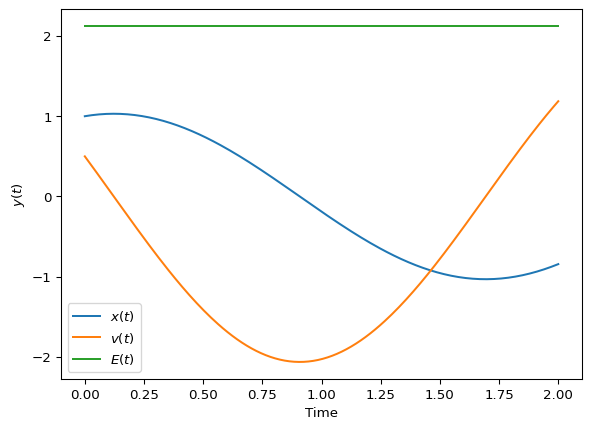

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(t_points, X_t[:, 0], label="$x(t)$")
ax.plot(t_points, X_t[:, 1], label="$v(t)$")
ax.plot(t_points, 0.5 * omega**2 * X_t[:, 0]**2 + 0.5 * X_t[:, 1]**2,
        label="$E(t)$")
ax.set_xlabel("Time")
ax.set_ylabel("$y(t)$")
ax.legend()
plt.show()

## 2. Numerical Integration via the Forward Euler Method

Let’s now implement the **forward Euler** method for a simpler ODE.
Consider the same harmonic oscillator, Euler’s method approximates the
evolution as:

$$
\begin{pmatrix}
  x_{n+1} \\ v_{n+1}
\end{pmatrix} \simeq
\begin{pmatrix}
  x_n \\ v_n
\end{pmatrix} + h \,
\begin{pmatrix}
  0 & 1 \\ -\omega^2 & 0
\end{pmatrix} \,
\begin{pmatrix}
  x_n \\ v_n
\end{pmatrix},
$$

where $h$ is the time step.

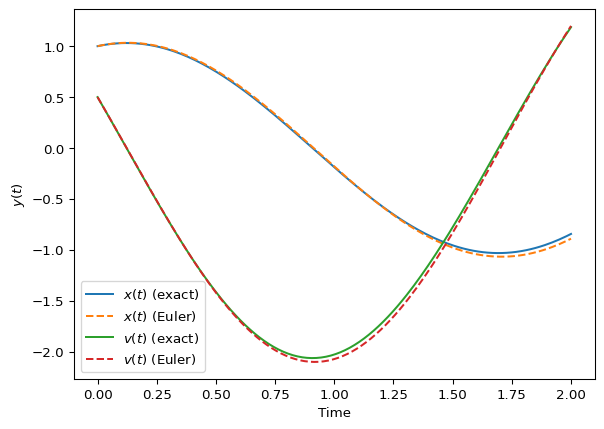

In [3]:
h = 0.01

X_t_euler = np.zeros((len(t_points), 2))
X_t_euler[0] = x0
for n in range(len(t_points) - 1):
    X_t_euler[n+1] = X_t_euler[n] + h * A @ X_t_euler[n]

fig, ax = plt.subplots()
ax.plot(t_points, X_t[:, 0], label="$x(t)$ (exact)")
ax.plot(t_points, X_t_euler[:, 0], label="$x(t)$ (Euler)", linestyle='--')
ax.plot(t_points, X_t[:, 1], label="$v(t)$ (exact)")
ax.plot(t_points, X_t_euler[:, 1], label="$v(t)$ (Euler)", linestyle='--')
ax.set_xlabel("Time")
ax.set_ylabel("$y(t)$")
ax.legend()
plt.show()

Here we see how the Euler solution compares to the exact solution
obtained via diagonalization. Notice that using a large time step $h$
can cause the Euler solution to deviate significantly from the exact
decay (and may even diverge if $|1 - \lambda h| \ge 1$).